In [2]:
from matplotlib import pyplot as plt
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
%load_ext autoreload
%autoreload 2

In [3]:
from utils import MyDataLoader
DL = MyDataLoader()
DL.read_gt("data/clusters.csv")
DL.data.head(10)

INFO:root:Loaded 1521 images


,cluster_id,file_name,cluster_num
0,5f1f5a4cb43b4a13b1f281d951ed7517,a00ee19f8bdd48a3af5ff78789887ad1.jpg,354
1,5f1f5a4cb43b4a13b1f281d951ed7517,9a34cabc4be94126a958267e2e3d1676.jpg,354
2,5f1f5a4cb43b4a13b1f281d951ed7517,381529cfa29942f3a30cb35247ff1c63.jpg,354
3,5f1f5a4cb43b4a13b1f281d951ed7517,c646ed62b45145c682733cfce9c815d7.jpg,354
4,5f1f5a4cb43b4a13b1f281d951ed7517,6a5d90d13fdc47348753144d5a33be71.jpg,354
5,5f1f5a4cb43b4a13b1f281d951ed7517,8da290af60ab462c911aaa603824fd52.jpg,354
6,5f1f5a4cb43b4a13b1f281d951ed7517,1a6f1972db7e41fdb731bd47433e2090.jpg,354
7,5f1f5a4cb43b4a13b1f281d951ed7517,3e7a3af1e0644d9bb417f0b051a8e0ec.jpg,354
8,5f1f5a4cb43b4a13b1f281d951ed7517,9ef20db40f2f4cc79efeb76ef5562cf0.jpg,354
9,5f1f5a4cb43b4a13b1f281d951ed7517,af1c87f519f2493980cbcd9cc11f5eb6.jpg,354


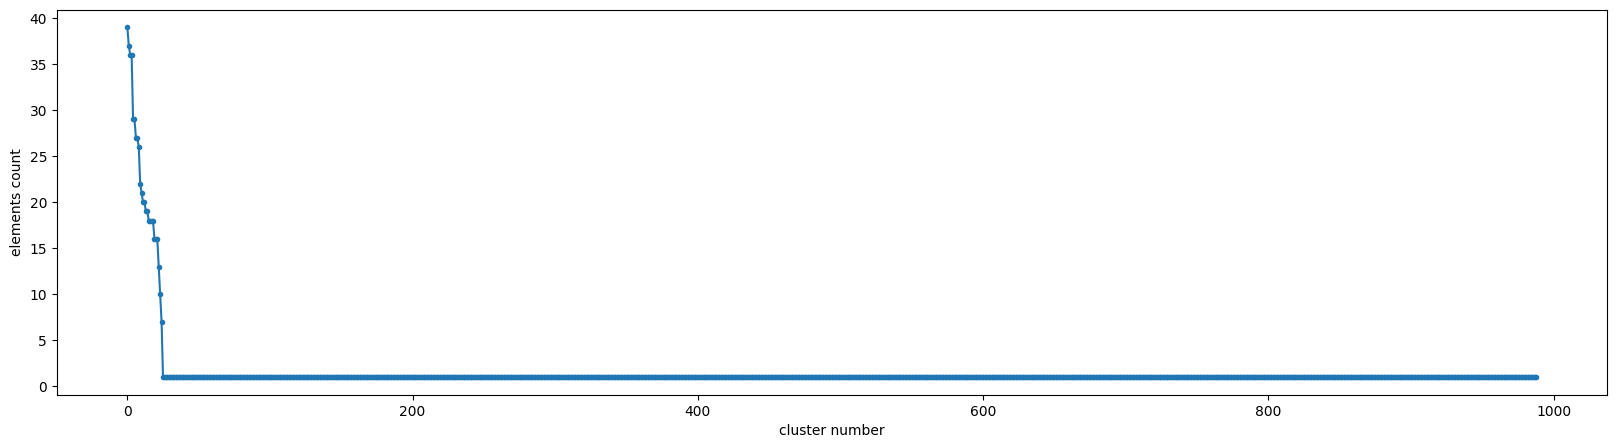

In [4]:
plt.subplots(figsize=(20, 5))
DL.show_stats()

In [50]:
DL.read_encodings("encodings.json")

INFO:root:Loaded 1521 encodings


In [57]:
x, y, img_names, boxes = DL.get_xy()

INFO:root:Sync images with faces. Encodings x: (596, 128), labeled clusters y:(596,)


In [59]:
from clusterization import MyClusterUsers
clust = MyClusterUsers()
clust.fit(x, min_samples_range=range(2, 10), eps_range=np.arange(0.2, 1., 0.1))

INFO:root:Best silhouette_score: 0.42612782684222705
INFO:root:min_samples: 2
INFO:root:eps: 0.4000000000000001
INFO:root:Unique faces: 25


In [60]:
clust.validate(y)

INFO:root:V-score: 0.94


0.9376759595461605

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


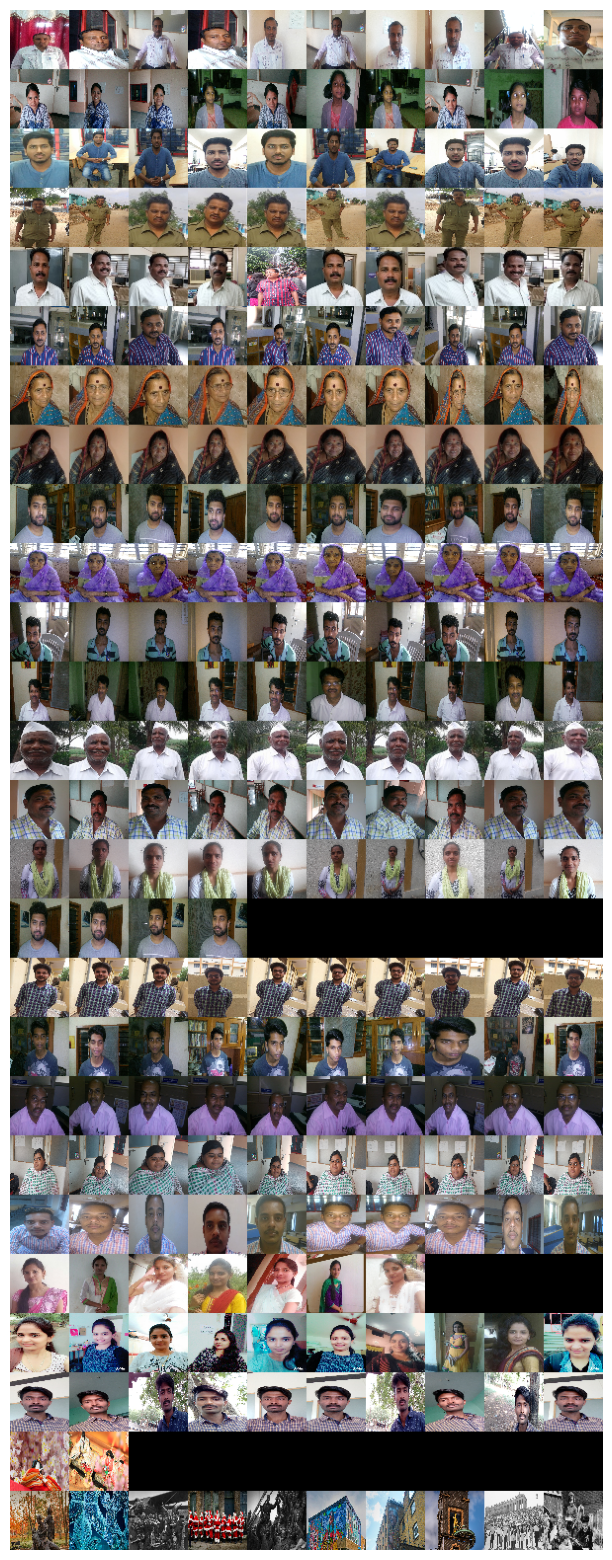

In [27]:
from utils import ClustersDrawer

clusters_drawer = ClustersDrawer(imgs_path=Path("data/clusters"))
clusters_drawer(clust.labs_pred, img_names)

In [35]:
import face_recognition
image = face_recognition.load_image_file("./data/clusters/008cf9a1c6bf40c98386dcb201a33b4b.jpg")
face_locations = face_recognition.face_locations(image)
face_locations

[(1150, 2427, 2108, 1469), (1097, 1026, 1418, 705)]

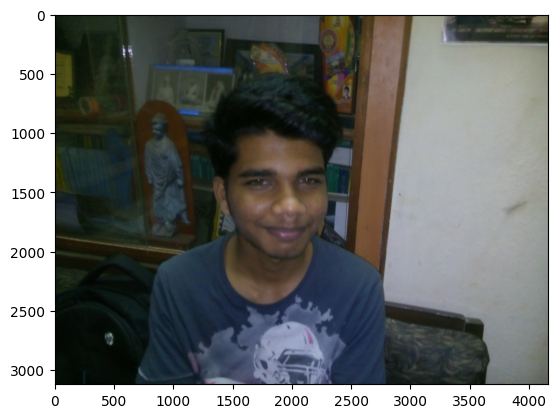

In [40]:
b = face_locations[1]
img_crop = image[b[0]:b[2], b[3]:b[1]]
plt.imshow(image)


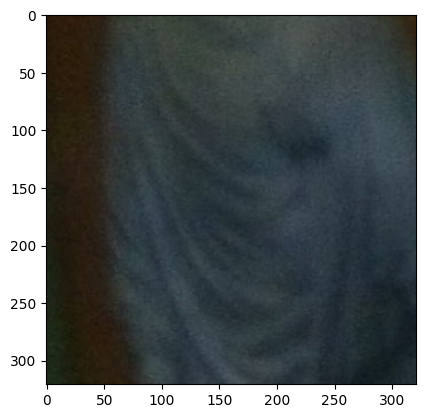

In [41]:
plt.imshow(img_crop)

In [1]:
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
nn = NearestNeighbors(n_neighbors=10).fit(x)
distances, indices = nn.kneighbors(x)
distances = distances[:, 1]
distances = np.sort(distances, axis=0)
l0 = int(len(distances)/2)
distances = distances[l0:]

dd = np.gradient(np.gradient(distances, 1), 1)
dd = np.convolve(dd, np.ones(60), "valid")
plt.figure(figsize=(10,8))
plt.plot(dd)
plt.plot(distances)

print(distances[200+60])


NameError: name 'x' is not defined